# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

# Download MNIST dataset - TENSORFLOW

In [2]:
mnist = tensorflow.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test =x_train.astype('float32') / 255., x_test.astype('float32') / 255.

# Display subset of Data

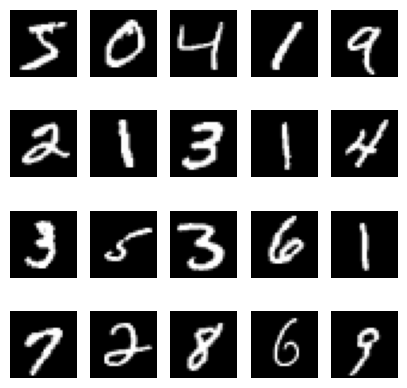

In [3]:
plt.figure(figsize=(5, 5))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# Shape of Data and Label

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Modified Shape of Data again

In [5]:
x_train = x_train[0:30000]
y_train = y_train[0:30000]
x_test = x_test[0:5000]
y_test = y_test[0:5000]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30000, 28, 28), (30000,), (5000, 28, 28), (5000,))

# Expand diemensions of the dataset

In [6]:
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30000, 28, 28, 1), (30000,), (5000, 28, 28, 1), (5000,))

# Shape the model

In [8]:
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, BatchNormalization, GlobalAvgPool2D, Flatten, Dropout

# Initialize model

In [9]:
model = tensorflow.keras.Sequential(
    [
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPool2D(2, 2),
        BatchNormalization(),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPool2D(2, 2),
        BatchNormalization(),

        GlobalAvgPool2D(),

        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

# Print model summary

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 5, 5, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,346 (399.79 KB)

 Trainable params: 101,962 (398.29 KB)

 Non-trainable params: 384 (1.50 KB)

# Compile the model

In [12]:
model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

# Run the model, save history object

In [14]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9976 - loss: 0.0082 - val_accuracy: 0.9533 - val_loss: 0.1855
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 0.9773 - val_loss: 0.0923
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9997 - loss: 0.0029 - val_accuracy: 0.9780 - val_loss: 0.0871
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9972 - loss: 0.0082 - val_accuracy: 0.8897 - val_loss: 0.5316
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9969 - loss: 0.0098 - val_accuracy: 0.9787 - val_loss: 0.0805
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9978 - loss: 0.0063 - val_accuracy: 0.9833 - val_loss: 0.0697
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9989 - loss: 0.0041 - val_accuracy: 0.9783 - val_loss: 0.0747
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9991 - loss: 0.0025 - 

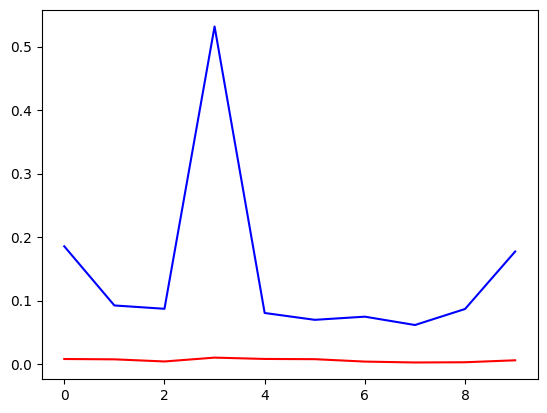

In [16]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')

# Test the model

In [18]:
model.evaluate(x_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9591 - loss: 0.1711


[0.16787433624267578, 0.9580000042915344]

# Predict classes

In [19]:
model.predict(x_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


array([[4.0187892e-12, 3.8783443e-09, 1.8802551e-09, ..., 9.9999940e-01,
        1.9330246e-11, 3.7343817e-08],
       [2.0159801e-11, 3.1681282e-06, 9.9999630e-01, ..., 4.6851447e-09,
        2.1013075e-11, 1.1979154e-10],
       [2.5629852e-08, 9.9997270e-01, 3.1327232e-07, ..., 1.9674355e-05,
        4.0005936e-09, 4.0440624e-09],
       ...,
       [4.0906485e-07, 2.3662760e-07, 9.7715229e-01, ..., 1.3894808e-08,
        2.1011519e-07, 3.0200342e-09],
       [1.6026212e-17, 4.0215076e-19, 4.1699999e-18, ..., 4.1254017e-16,
        1.6528714e-11, 2.5777974e-12],
       [9.9999940e-01, 8.5579044e-12, 2.5995703e-12, ..., 2.6485550e-10,
        1.1890555e-09, 6.3333673e-08]], dtype=float32)

In [20]:
predict_x = model.predict(x_test)
classes_x = np.argmax(predict_x,axis=1)
classes_x

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


array([7, 2, 1, ..., 2, 4, 0], dtype=int64)

# Draw the images

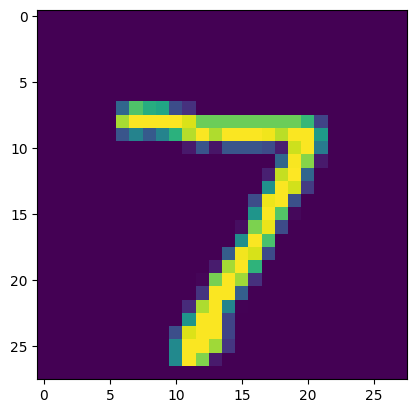

In [22]:
plt.imshow(np.squeeze(x_test[0]))

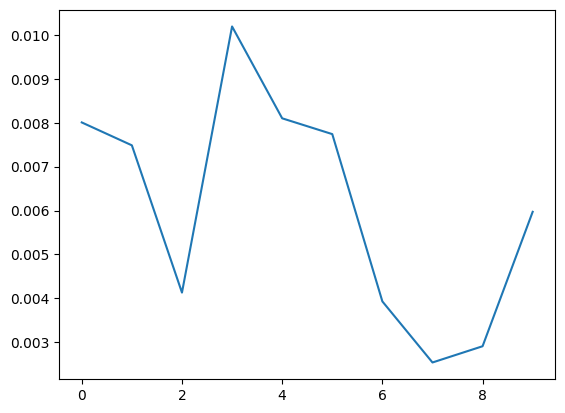

In [23]:
plt.plot(history.history['loss'])

# Plot results

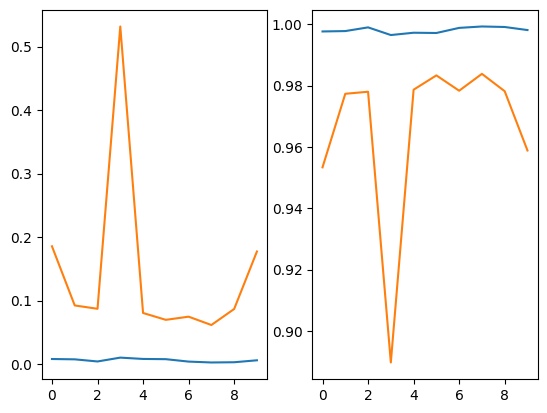

In [24]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Add drop out for results

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 86ms/step - accuracy: 0.7466 - loss: 0.8434 - val_accuracy: 0.1152 - val_loss: 4.8701
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.9699 - loss: 0.1037 - val_accuracy: 0.8878 - val_loss: 0.3414
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9823 - loss: 0.0645 - val_accuracy: 0.9192 - val_loss: 0.2435
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9855 - loss: 0.0487 - val_accuracy: 0.9318 - val_loss: 0.2078
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.9856 - loss: 0.0472 - val_accuracy: 0.9492 - val_loss: 0.1596
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9891 - loss: 0.0369 - val_accuracy: 0.9535 - val_loss: 0.1513
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.9904 - loss: 0.0303 - val_accuracy: 0.9675 - val_loss: 0.1128
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9914 - loss: 0.0276 - 

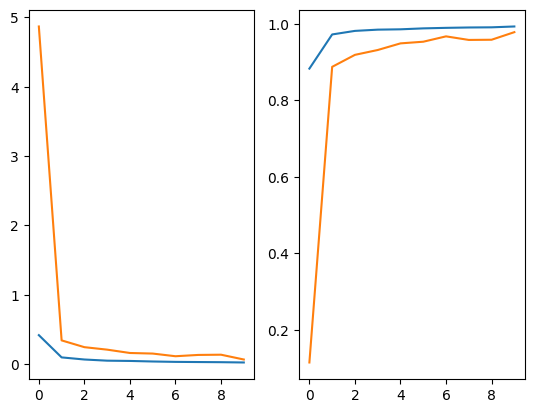

In [25]:
model = tensorflow.keras.Sequential(
    [
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        Dropout(0.3),
        MaxPool2D(2, 2),
        BatchNormalization(),

        Conv2D(128, (3, 3), activation='relu'),
        Dropout(0.3),
        MaxPool2D(2, 2),
        BatchNormalization(),

        GlobalAvgPool2D(),

        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)
model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_split = 0.2, verbose = 1)
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

 # 0.9980 	 0.9710 =	 0.0270 Without dropout
 # 0.9934 	 0.9964 =	-0.0030 With dropout
